In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
data = pd.read_csv(r"F:\GUVI\Project\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\Codes\Cleaned_Train_data.csv", index_col=0)

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Date,Time
0,180388628218,0,612,123247,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3,2024-06-04,06:05:15
1,455266534868,88,326,210035,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-14,03:01:25
2,1056561957389,809,58352,712507,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-13,04:52:55
3,1279900258736,92,32992,774301,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-10,16:39:36
4,214748368522,148,4359,188041,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024-06-15,01:08:07


In [6]:
data.isnull().mean() * 100

Id                    0.0
OrgId                 0.0
IncidentId            0.0
AlertId               0.0
DetectorId            0.0
AlertTitle            0.0
Category              0.0
IncidentGrade         0.0
EntityType            0.0
EvidenceRole          0.0
DeviceId              0.0
Sha256                0.0
IpAddress             0.0
Url                   0.0
AccountSid            0.0
AccountUpn            0.0
AccountObjectId       0.0
AccountName           0.0
DeviceName            0.0
NetworkMessageId      0.0
RegistryKey           0.0
RegistryValueName     0.0
RegistryValueData     0.0
ApplicationId         0.0
ApplicationName       0.0
OAuthApplicationId    0.0
FileName              0.0
FolderPath            0.0
ResourceIdName        0.0
OSFamily              0.0
OSVersion             0.0
CountryCode           0.0
State                 0.0
City                  0.0
Date                  0.0
Time                  0.0
dtype: float64

In [7]:
data.select_dtypes(include="object")

,Category,IncidentGrade,EntityType,EvidenceRole,Date,Time
0,InitialAccess,TruePositive,Ip,Related,2024-06-04,06:05:15
1,Exfiltration,FalsePositive,User,Impacted,2024-06-14,03:01:25
2,InitialAccess,FalsePositive,Url,Related,2024-06-13,04:52:55
3,CommandAndControl,BenignPositive,Url,Related,2024-06-10,16:39:36
4,Execution,TruePositive,User,Impacted,2024-06-15,01:08:07
...,...,...,...,...,...,...
9516832,InitialAccess,TruePositive,CloudLogonRequest,Related,2024-06-08,15:26:08
9516833,CommandAndControl,BenignPositive,Url,Related,2024-06-06,09:40:08
9516834,Exfiltration,BenignPositive,MailMessage,Impacted,2024-06-11,22:51:03
9516835,Impact,BenignPositive,Ip,Related,2024-05-20,23:01:01


In [8]:
le = LabelEncoder()

for i in data.select_dtypes(include="object"):
    data[i] = le.fit_transform(data[i])


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9516837 entries, 0 to 9516836
Data columns (total 36 columns):
 #   Column              Dtype
---  ------              -----
 0   Id                  int64
 1   OrgId               int64
 2   IncidentId          int64
 3   AlertId             int64
 4   DetectorId          int64
 5   AlertTitle          int64
 6   Category            int32
 7   IncidentGrade       int32
 8   EntityType          int32
 9   EvidenceRole        int32
 10  DeviceId            int64
 11  Sha256              int64
 12  IpAddress           int64
 13  Url                 int64
 14  AccountSid          int64
 15  AccountUpn          int64
 16  AccountObjectId     int64
 17  AccountName         int64
 18  DeviceName          int64
 19  NetworkMessageId    int64
 20  RegistryKey         int64
 21  RegistryValueName   int64
 22  RegistryValueData   int64
 23  ApplicationId       int64
 24  ApplicationName     int64
 25  OAuthApplicationId  int64
 26  FileName           

In [10]:
data_corr = data.corr()

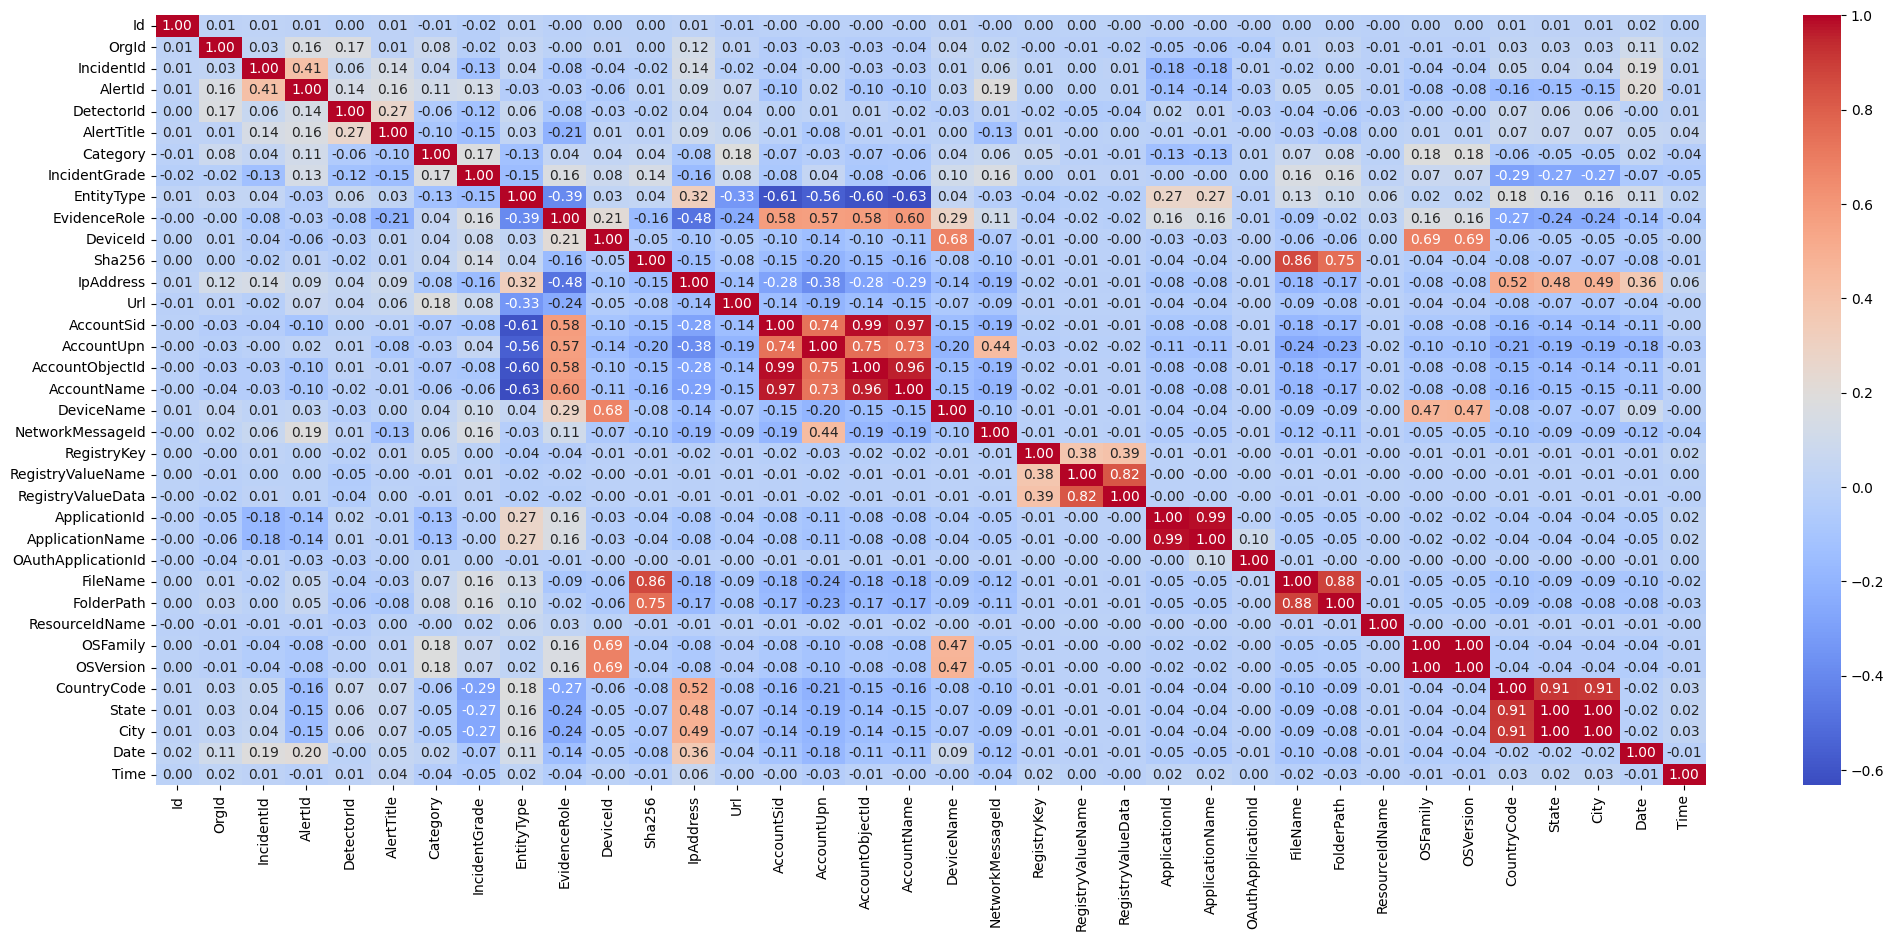

In [15]:
plt.figure(figsize=(25,10))
sns.heatmap(data=data_corr,fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

In [11]:
data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Date,Time
0,180388628218,0,612,123247,7,6,10,2,15,1,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3,159,21915
1,455266534868,88,326,210035,58,43,7,1,32,0,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,169,10885
2,1056561957389,809,58352,712507,423,298,10,1,31,1,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,168,17575
3,1279900258736,92,32992,774301,2,2,1,0,31,1,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,165,59976
4,214748368522,148,4359,188041,9,74,6,2,32,0,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,170,4087


In [47]:
'''

outliers = ["OrgId", "AlertId", "DetectorId", "AlertTitle", 'Category', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', "AccountObjectId",
            "AccountName", "DeviceName", 'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName',
            'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City', 'Date']

'''

'\n\noutliers = ["OrgId", "AlertId", "DetectorId", "AlertTitle", \'Category\', \'DeviceId\', \'Sha256\', \'IpAddress\', \'Url\', \'AccountSid\', "AccountObjectId",\n            "AccountName", "DeviceName", \'NetworkMessageId\', \'RegistryKey\', \'RegistryValueName\', \'RegistryValueData\', \'ApplicationId\', \'ApplicationName\',\n            \'OAuthApplicationId\', \'FileName\', \'FolderPath\', \'ResourceIdName\', \'OSFamily\', \'OSVersion\', \'CountryCode\', \'State\', \'City\', \'Date\']\n\n'

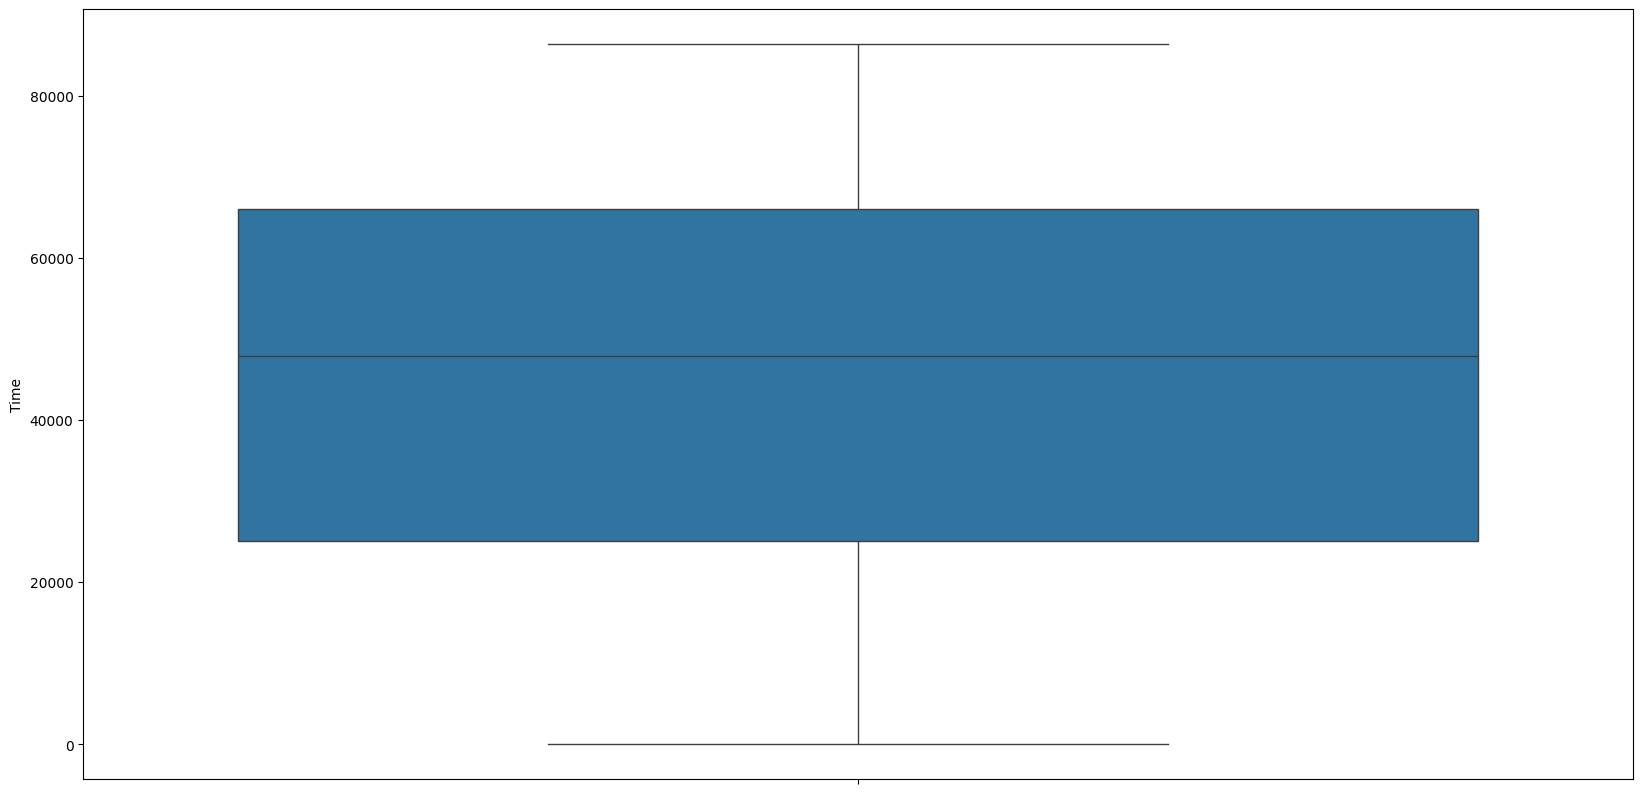

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data["Time"])
plt.show()

In [48]:
# correlated columns

corr_columns = ['FileName', 'FolderPath', 'AccountUpn', 'AccountObjectId', 'AccountName', 'RegistryValueData', 'ApplicationName', 'FolderPath', 'OSVersion', 'State', 'City']

In [49]:
# removing the correlated columns and saving the data

data.drop(corr_columns, axis=1, inplace=True)

In [50]:
data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Date,Time
0,180388628218,0,612,123247,7,6,10,2,15,1,98799,138268,27,160396,441377,153085,529644,1631,635,2251,881,3586,5,31,159,21915
1,455266534868,88,326,210035,58,43,7,1,32,0,98799,138268,360606,160396,22406,153085,529644,1631,635,2251,881,3586,5,242,169,10885
2,1056561957389,809,58352,712507,423,298,10,1,31,1,98799,138268,360606,68652,441377,153085,529644,1631,635,2251,881,3586,5,242,168,17575
3,1279900258736,92,32992,774301,2,2,1,0,31,1,98799,138268,360606,13,441377,153085,529644,1631,635,2251,881,3586,5,242,165,59976
4,214748368522,148,4359,188041,9,74,6,2,32,0,98799,138268,360606,160396,449,153085,529644,1631,635,2251,881,3586,5,242,170,4087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,10,2,6,1,98799,138268,360606,160396,441377,153085,529644,1631,635,2251,881,3586,5,242,163,55568
9516833,1228360650033,59,196410,748366,2,2,1,0,31,1,98799,138268,360606,164,441377,153085,529644,1631,635,2251,881,3586,5,242,161,34808
9516834,867583395122,44,14117,7425,78,57,7,0,21,0,98799,138268,360606,160396,441377,153085,22919,1631,635,2251,881,3586,5,242,166,82263
9516835,395136991850,43,644,8973,52,10,9,0,15,1,98799,138268,465,160396,441377,153085,529644,1631,635,2251,881,3586,5,242,144,82861


In [52]:
data_corr = data.corr()

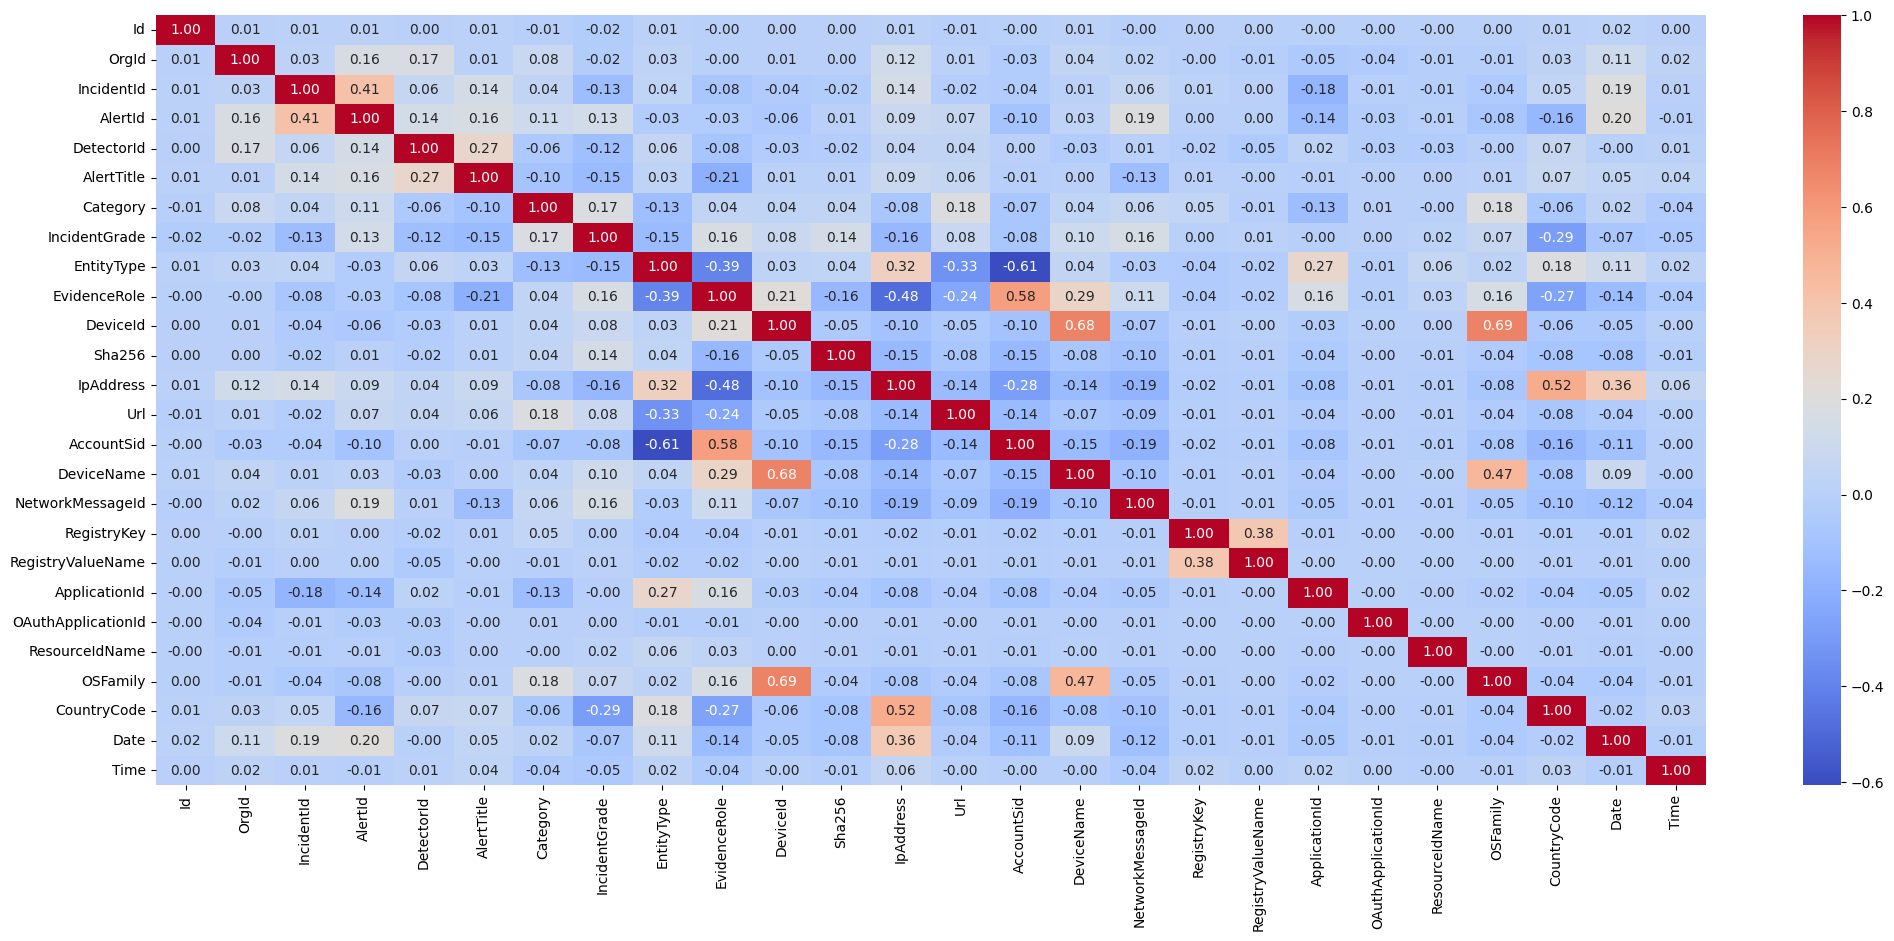

In [53]:
plt.figure(figsize=(25,10))
sns.heatmap(data=data_corr,fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

In [54]:
test_data = pd.read_csv(r"F:\GUVI\Project\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\Codes\Cleaned_Test_data.csv", index_col=0)

In [55]:
test_data.drop(corr_columns, axis=1, inplace=True)

In [56]:
test_data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Date,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,153085,529644,1631,635,2251,881,3586,5,242,2024-06-04,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,2833,529644,1631,635,2251,881,3586,0,242,2024-06-03,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,153085,529644,1631,635,2251,881,3586,5,242,2024-06-08,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,153085,529644,1631,635,2251,881,3586,5,242,2024-06-12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,153085,529644,1631,635,2251,881,3586,5,242,2024-06-06,17:42:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,139,120,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,13354,153085,529644,1631,635,2251,881,3586,5,242,2024-06-04,03:53:15
4147988,438086666953,1323,31001,304819,219,196,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,95744,153085,529644,1631,635,2251,881,3586,5,242,2024-06-04,19:32:19
4147989,1297080124487,47,3653,7243,57,29,CommandAndControl,FalsePositive,Ip,Related,98799,138268,1084,160396,441377,153085,529644,1631,635,2251,881,3586,5,242,2024-06-15,00:50:22
4147990,627065226886,70,4243,19142,1,1,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,53146,153085,529644,1631,635,2251,881,3586,5,242,2024-06-11,16:18:12


In [57]:
sample_data = pd.read_csv(r"F:\GUVI\Project\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\Codes\Cleaned_sample_data.csv", index_col=0)

In [58]:
sample_data.drop(corr_columns, axis=1, inplace=True)

In [59]:
sample_data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Date,Time
0,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,153085,529644,1631,635,2251,881,3586,5,242,2024-06-06,05:56:47
1,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,3142,529644,1631,635,2251,881,3586,5,242,2024-06-03,10:45:09
2,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,4181,529644,1631,635,2251,881,3586,5,242,2024-06-13,03:36:40
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,153085,529644,1631,635,2251,881,3586,5,242,2024-06-08,16:54:57
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,153085,529644,1631,635,2251,881,3586,5,242,2024-06-09,02:48:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,103079215470,142,93987,15739,112,7836,Exfiltration,FalsePositive,MailMessage,Impacted,98799,138268,360606,160396,441377,153085,869,1631,635,2251,881,3586,5,242,2024-06-10,10:25:17
4758414,1683627184337,36,1001,257479,2,2,CommandAndControl,FalsePositive,User,Impacted,98799,138268,360606,160396,32117,153085,529644,1631,635,2251,881,3586,5,242,2024-06-11,19:30:52
4758415,1597727836318,851,31194,1518250,1,1,InitialAccess,BenignPositive,MailMessage,Related,98799,138268,360606,160396,441377,153085,402271,1631,635,2251,881,3586,5,242,2024-06-09,04:27:41
4758416,137438957239,12,2419,1203,16,1334,Impact,BenignPositive,Ip,Related,98799,138268,546,160396,441377,153085,529644,1631,635,2251,881,3586,5,242,2024-05-21,23:01:11


In [62]:
data.to_csv("F:\GUVI\Project\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\Model data\model_train_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\syeda\AppData\Local\Temp\ipykernel_25916\3508435698.py:1: SyntaxWarning: invalid escape sequence '\G'
  data.to_csv("F:\GUVI\Project\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\Model data\model_train_data.csv")


In [63]:
test_data.to_csv("F:\GUVI\Project\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\Model data\model_test_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\syeda\AppData\Local\Temp\ipykernel_25916\1940570605.py:1: SyntaxWarning: invalid escape sequence '\G'
  test_data.to_csv("F:\GUVI\Project\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\Model data\model_test_data.csv")


In [64]:
sample_data.to_csv("F:\GUVI\Project\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\Model data\model_sample_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\syeda\AppData\Local\Temp\ipykernel_25916\1027920720.py:1: SyntaxWarning: invalid escape sequence '\G'
  sample_data.to_csv("F:\GUVI\Project\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\Model data\model_sample_data.csv")
